<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model


In [27]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-06-02 19:17:13--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  1.44MB/s    in 0.3s    

2022-06-02 19:17:14 (1.44 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [28]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [29]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [30]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [32]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.columns=['labels','data']

In [34]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y=df['b_labels'].values

In [36]:
df_train,df_test,Y_train,Ytest=train_test_split(df['data'],Y,test_size=0.33)

In [37]:
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_test=tokenizer.texts_to_sequences(df_test)

In [38]:
word2idx=tokenizer.word_index
V=len(word2idx)
print("Found %s unique tokens."%V)

Found 7251 unique tokens.


In [39]:
data_train=pad_sequences(sequences_train)
print("Shape of data train tensor:",data_train.shape)

T=data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [40]:
data_test=pad_sequences(sequences_test,maxlen=T)
print("Shape of data train tensor:",data_test.shape)

T=data_test.shape[1]

Shape of data train tensor: (1839, 189)


In [42]:
D=20

M=15

i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)

In [44]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
r=model.fit(
    data_train,
    Y_train,
    epochs=10,
    validation_data=(data_test,Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 20s 128ms/step - loss: 0.4582 - accuracy: 0.8623 - val_loss: 0.3673 - val_accuracy: 0.8706
Epoch 2/10
117/117 [==============================] - 10s 85ms/step - loss: 0.3241 - accuracy: 0.8636 - val_loss: 0.2866 - val_accuracy: 0.8706
Epoch 3/10
117/117 [==============================] - 10s 86ms/step - loss: 0.2684 - accuracy: 0.8636 - val_loss: 0.2441 - val_accuracy: 0.8706
Epoch 4/10
117/117 [==============================] - 10s 83ms/step - loss: 0.2134 - accuracy: 0.8636 - val_loss: 0.1922 - val_accuracy: 0.8706
Epoch 5/10
117/117 [==============================] - 14s 119ms/step - loss: 0.1598 - accuracy: 0.9582 - val_loss: 0.1541 - val_accuracy: 0.9690
Epoch 6/10
117/117 [==============================] - 16s 139ms/step - loss: 0.1170 - accuracy: 0.9869 - val_loss: 0.1227 - val_accuracy: 0.9761
Epoch 7/10
117/117 [==============================] - 10s 86ms/step - loss: 0.0787 - accuracy: 0.9917 - val_loss: 0

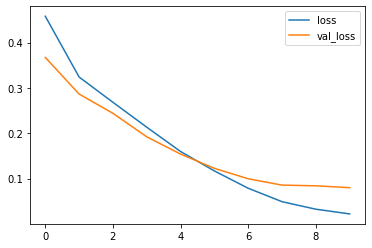

In [45]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

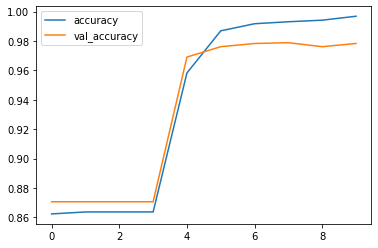

In [46]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()